In [19]:
import pandas as pd

data = pd.read_csv('C:/Users/akmal.rasidi/Desktop/Projek Data/Dataset.csv')

print (data)

       AGE     SEX     LOCATION  LOAN RATES  \
0       28  female    PUTRAJAYA        6.03   
1       32  female       DUNGUN        3.75   
2       33  female  TANAH MERAH        6.00   
3       34  female      SETAPAK        6.03   
4       57    male       MELAKA        3.95   
...    ...     ...          ...         ...   
88228   56    male      SETAPAK        3.99   
88229   46    male      SETAPAK        6.00   
88230   49  female      SETAPAK        3.99   
88231   52    male   ALOR SETAR        6.25   
88232   50    male    PUTRAJAYA        6.00   

                                             OCCUPATIONS  AMOUNT FINANCING  \
0                                 Teaching Professionals             44500   
1                                 Teaching Professionals             60000   
2                         Health Associate Professionals            132000   
3                                        Medical Doctors            151000   
4                                 Teaching Pr

In [16]:
data.head(10)

,AGE,SEX,LOCATION,LOAN RATES,OCCUPATIONS,AMOUNT FINANCING,PERIOD,INCOME RANGE,DEFAULT
0,28,female,PUTRAJAYA,6.03,Teaching Professionals,44500,120,"< 1,000",N
1,32,female,DUNGUN,3.75,Teaching Professionals,60000,120,"< 1,000",N
2,33,female,TANAH MERAH,6.00,Health Associate Professionals,132000,120,"< 1,000",N
3,34,female,SETAPAK,6.03,Medical Doctors,151000,120,"< 1,000",N
4,57,male,MELAKA,3.95,Teaching Professionals,9000,120,"> 1,000 - 3,000",Y
5,35,female,KUALA SELANGOR,4.20,Housewife/Househusband,41000,120,"< 1,000",N
6,35,female,MANJUNG,6.03,Clerical Support Workers,86500,120,"< 1,000",N
7,36,female,MANJUNG,6.03,Business and Administrations Associate Profess...,138000,120,"< 1,000",Y
8,37,female,MELAKA,5.10,Housewife/Househusband,30000,240,"< 1,000",Y
9,37,female,KUALA LUMPUR,4.80,Business and Administrations Associate Profess...,42000,240,"< 1,000",Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE               88233 non-null  int64  
 1   SEX               88233 non-null  object 
 2   LOCATION          88233 non-null  object 
 3   LOAN RATES        88233 non-null  float64
 4   OCCUPATIONS       88233 non-null  object 
 5   AMOUNT FINANCING  88233 non-null  int64  
 6   PERIOD            88233 non-null  int64  
 7   INCOME RANGE      88233 non-null  object 
 8   DEFAULT           88233 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.1+ MB


In [5]:
data.describe()

,AGE,LOAN RATES,AMOUNT FINANCING,PERIOD
count,88233.000000,88233.000000,88233.000000,88233.000000
mean,42.926683,4.743368,74177.092811,123.434769
std,8.053355,1.119867,56760.808816,35.356764
min,21.000000,2.690000,1000.000000,12.000000
25%,37.000000,3.750000,30000.000000,120.000000
50%,42.000000,4.750000,60000.000000,120.000000
75%,49.000000,6.000000,105000.000000,120.000000
max,71.000000,10.500000,400000.000000,656.000000


In [6]:
wc= data ['LOCATION'].value_counts()
wc_df = wc.reset_index()
wc_df.columns=['LOCATION', 'count']
wc_df

,LOCATION,count
0,ALOR SETAR,4935
1,TAIPING,4598
2,SHAH ALAM,4500
3,KUALA LUMPUR,4438
4,BUTTERWORTH,4124
5,KUANTAN,4112
6,SUNGAI PETANI,4096
7,IPOH,4063
8,KOTA BHARU,4028
9,KANGAR,3938


In [8]:
data.max()

AGE                                     71
SEX                                   male
LOCATION                          TEMERLOH
LOAN RATES                            10.5
OCCUPATIONS         Teaching Professionals
AMOUNT FINANCING                    400000
PERIOD                                 656
INCOME RANGE              > 8,000 - 10,000
DEFAULT                                  Y
dtype: object

In [7]:
data.isna().any().any()

False

In [2]:
data.mode()

,AGE,SEX,LOCATION,LOAN RATES,OCCUPATIONS,AMOUNT FINANCING,PERIOD,INCOME RANGE,DEFAULT
0,42,male,ALOR SETAR,6.0,Clerical Support Workers,50000,120,"> 3,000 - 5,000",N


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/akmal.rasidi/Desktop/Projek Data/Dataset.csv')

# Display the class distribution of the target variable 'DEFAULT'
class_distribution = data['DEFAULT'].value_counts()
print("Original class distribution:\n", class_distribution)

# Separate features and target
X = data.drop(columns=['DEFAULT'])
y = data['DEFAULT']

# One-hot encode the categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the new class distribution
new_class_distribution = y_train_res.value_counts()
print("New class distribution after SMOTE:\n", new_class_distribution)

Original class distribution:
 DEFAULT
N    66675
Y    21558
Name: count, dtype: int64
New class distribution after SMOTE:
 DEFAULT
N    46659
Y    46659
Name: count, dtype: int64


In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/akmal.rasidi/Desktop/Projek Data/Dataset.csv')

# Display the class distribution of the target variable 'DEFAULT'
class_distribution = data['DEFAULT'].value_counts()
print("Original class distribution:\n", class_distribution)

# Separate features and target
X = data.drop(columns=['DEFAULT'])
y = data['DEFAULT']

# One-hot encode the categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the new class distribution
new_class_distribution = y_train_res.value_counts()
print("New class distribution after SMOTE:\n", new_class_distribution)

# Save the resampled training data to a CSV file
X_train_resampled = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_resampled = pd.DataFrame(y_train_res, columns=['DEFAULT'])

# Concatenate the features and target into a single DataFrame
resampled_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Save to CSV
resampled_data.to_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF.csv', index=False)

print("Resampled training data saved to ''C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF.csv''")

Original class distribution:
 DEFAULT
N    66675
Y    21558
Name: count, dtype: int64
New class distribution after SMOTE:
 DEFAULT
N    46659
Y    46659
Name: count, dtype: int64
esampled_training_AF.csv''ved to ''C:/Users/akmal.rasidi/Desktop/Projek Data


In [4]:
resampled_data.head()

,AGE,LOAN RATES,AMOUNT FINANCING,PERIOD,SEX_female,SEX_male,LOCATION_ALOR SETAR,LOCATION_BATU PAHAT,LOCATION_BAYAN BARU,LOCATION_BUTTERWORTH,...,"OCCUPATIONS_Social, Cultural and Related Associate Professionals",OCCUPATIONS_Student,OCCUPATIONS_Teaching Professionals,"INCOME RANGE_< 1,000","INCOME RANGE_> 1,000 - 3,000","INCOME RANGE_> 10,000","INCOME RANGE_> 3,000 - 5,000","INCOME RANGE_> 5,000 - 8,000","INCOME RANGE_> 8,000 - 10,000",DEFAULT
0,43,6.03,123000,120,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,N
1,46,4.75,17000,152,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,Y
2,47,4.75,18000,324,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Y
3,43,5.10,63000,240,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,Y
4,34,10.00,130000,120,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,Y


In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data/Dataset.csv')

# Display the class distribution of the target variable 'DEFAULT'
class_distribution = data['DEFAULT'].value_counts()
print("Original class distribution:\n", class_distribution)

# Separate features and target
X = data.drop(columns=['DEFAULT'])
y = data['DEFAULT']

# One-hot encode the categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the new class distribution
new_class_distribution = y_train_res.value_counts()
print("New class distribution after SMOTE:\n", new_class_distribution)

# Combine the resampled features and target
X_train_resampled = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_resampled = pd.DataFrame(y_train_res, columns=['DEFAULT'])

# Concatenate the features and target into a single DataFrame
resampled_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Convert 'N' and 'Y' in the 'DEFAULT' column to 0 and 1 if they exist
if 'DEFAULT' in resampled_data.columns:
    resampled_data['DEFAULT'] = resampled_data['DEFAULT'].map({'N': 0, 'Y': 1})

# Convert boolean columns to integer columns (0 and 1)
resampled_data = resampled_data.astype(int)

# Check for any missing values
missing_values = resampled_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Verify the data types of each column
data_types = resampled_data.dtypes
print("Data types of each column:\n", data_types)

# Save the cleaned resampled dataset to a CSV file
resampled_data.to_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF2.csv', index=False)

print("Cleaned resampled training data saved to 'C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF2.csv'")

Original class distribution:
 DEFAULT
N    66675
Y    21558
Name: count, dtype: int64
New class distribution after SMOTE:
 DEFAULT
N    46659
Y    46659
Name: count, dtype: int64
Missing values in each column:
 AGE                              0
LOAN RATES                       0
AMOUNT FINANCING                 0
PERIOD                           0
SEX_female                       0
                                ..
INCOME RANGE_> 10,000            0
INCOME RANGE_> 3,000 - 5,000     0
INCOME RANGE_> 5,000 - 8,000     0
INCOME RANGE_> 8,000 - 10,000    0
DEFAULT                          0
Length: 90, dtype: int64
Data types of each column:
 AGE                              int32
LOAN RATES                       int32
AMOUNT FINANCING                 int32
PERIOD                           int32
SEX_female                       int32
                                 ...  
INCOME RANGE_> 10,000            int32
INCOME RANGE_> 3,000 - 5,000     int32
INCOME RANGE_> 5,000 - 8,000     int32


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Load the cleaned and resampled dataset
resampled_data = pd.read_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF2.csv')

# Separate features and target
X = resampled_data.drop(columns=['DEFAULT'])
y = resampled_data['DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top 10 features using SelectKBest
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_train_best = select_k_best.fit_transform(X_train_scaled, y_train)
X_test_best = select_k_best.transform(X_test_scaled)

# Get the selected feature names
selected_features = X_train.columns[select_k_best.get_support()]
print("Selected Features:\n", selected_features)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the KNN model with the selected features
knn.fit(X_train_best, y_train)

# Make predictions
y_pred = knn.predict(X_test_best)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Selected Features:
 Index(['AGE', 'LOAN RATES', 'PERIOD', 'SEX_male', 'LOCATION_BUTTERWORTH',
       'LOCATION_IPOH', 'LOCATION_KOTA BHARU', 'LOCATION_TAIPING',
       'OCCUPATIONS_Business and Administrations Associate Professionals',
       'INCOME RANGE_> 1,000 - 3,000'],
      dtype='object')
Accuracy: 0.7880
Precision: 0.8002
Recall: 0.7670
F1 Score: 0.7832

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14019
           1       0.80      0.77      0.78     13977

    accuracy                           0.79     27996
   macro avg       0.79      0.79      0.79     27996
weighted avg       0.79      0.79      0.79     27996


Confusion Matrix:
[[11342  2677]
 [ 3257 10720]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the cleaned and resampled dataset
resampled_data = pd.read_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data\resampled_training_AF2.csv')

# Separate features and target
X = resampled_data.drop(columns=['DEFAULT'])
y = resampled_data['DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8531
Precision: 0.8511
Recall: 0.8553
F1 Score: 0.8532

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     14019
           1       0.85      0.86      0.85     13977

    accuracy                           0.85     27996
   macro avg       0.85      0.85      0.85     27996
weighted avg       0.85      0.85      0.85     27996


Confusion Matrix:
[[11928  2091]
 [ 2022 11955]]


In [10]:
import pandas as pd

# Load the CSV file
resampled_data = pd.read_csv(r'C:/Users/akmal.rasidi/Desktop/Projek Data/resampled_training_AF2.csv')

# Display the first few rows and column names
print(resampled_data.head())
print(resampled_data.columns)

   AGE  LOAN RATES  AMOUNT FINANCING  PERIOD  SEX_female  SEX_male  \
0   43           6            123000     120           0         1   
1   46           4             17000     152           0         1   
2   47           4             18000     324           1         0   
3   43           5             63000     240           1         0   
4   34          10            130000     120           0         1   

   LOCATION_ALOR SETAR  LOCATION_BATU PAHAT  LOCATION_BAYAN BARU  \
0                    0                    0                    0   
1                    1                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   LOCATION_BUTTERWORTH  ...  \
0                     0  ...   
1                     0  ...   
2                     0  ...   
3                     1  ...   
4         

In [20]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('C:/Users/akmal.rasidi/Desktop/Projek Data/Dataset.csv')

# Display the first few rows and column names
print(data.head())
print(data.columns)

   AGE     SEX     LOCATION  LOAN RATES                     OCCUPATIONS  \
0   28  female    PUTRAJAYA        6.03          Teaching Professionals   
1   32  female       DUNGUN        3.75          Teaching Professionals   
2   33  female  TANAH MERAH        6.00  Health Associate Professionals   
3   34  female      SETAPAK        6.03                 Medical Doctors   
4   57    male       MELAKA        3.95          Teaching Professionals   

   AMOUNT FINANCING  PERIOD     INCOME RANGE DEFAULT  
0             44500     120          < 1,000       N  
1             60000     120          < 1,000       N  
2            132000     120          < 1,000       N  
3            151000     120          < 1,000       N  
4              9000     120  > 1,000 - 3,000       Y  
Index(['AGE', 'SEX', 'LOCATION', 'LOAN RATES', 'OCCUPATIONS',
       'AMOUNT FINANCING', 'PERIOD', 'INCOME RANGE', 'DEFAULT'],
      dtype='object')


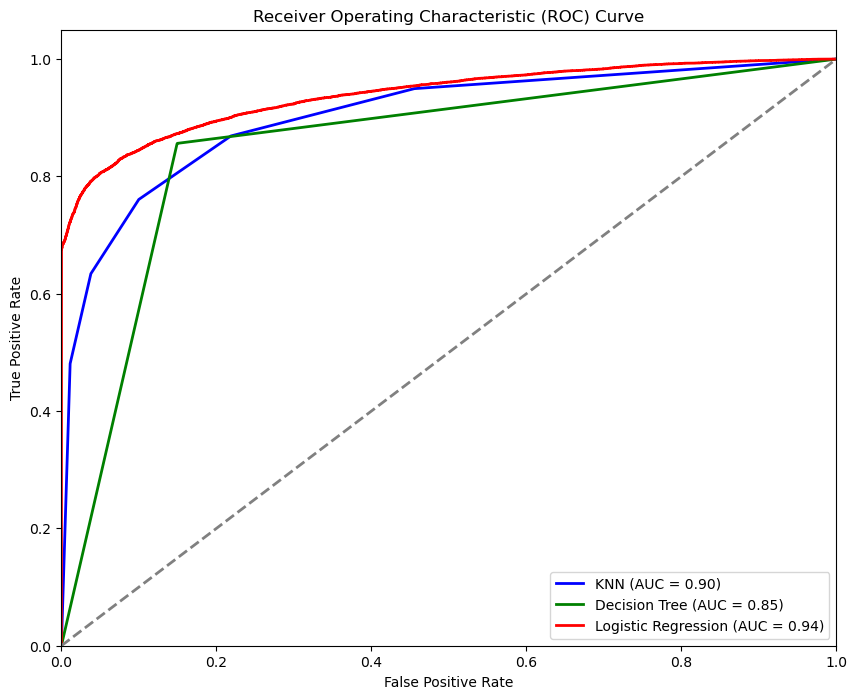

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\user\Desktop\Data Science\FYP Project\cleaned_resampled_training_data.csv')

# Separate features and target
X = data.drop(columns=['DEFAULT'])
y = data['DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for KNN and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the plot as an image file
plt.savefig(r'C:\Users\user\Desktop\Data Science\FYP Project\roc_curve.png')

plt.show()
